In [8]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import glob
import seaborn as sns

In [19]:
whole_brain = mesh.Mesh.from_file('/Users/sbandya/Desktop/wholebrain.stl')
one_brain = glob.glob("/Users/sbandya/Desktop/testmesh/*")

whole_brain_volume =  whole_brain.get_mass_properties()[0]
vacuole_volumes = list()
for meshfile in one_brain:
    vacuole = mesh.Mesh.from_file(meshfile)
    volume, cog, inertia = vacuole.get_mass_properties()
    vacuole_volumes.append(volume)

Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-

In [24]:
total_vacuoles = sum(vacuole_volumes)
percent_vacuoles = 100*total_vacuoles/whole_brain_volume
print(percent_vacuoles)


0.7280100586731793


/Users/sbandya/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


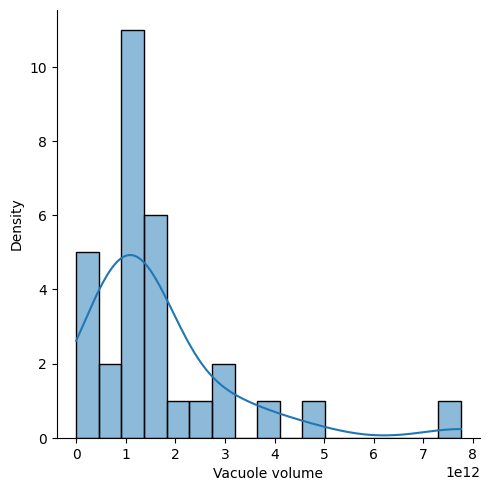

In [34]:
g = sns.displot(vacuole_volumes, kde=True)
g.set_axis_labels("Vacuole volume","Density")
g.set_titles("repodrprRNAi40-42D_male")